In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime, timedelta

Interesting thing from the start, he lays out three ways of referring to time that he's going to discuss in the chapter (timestamps, fixed periods - special case of intervals, and intervals), and then also says there's 'experiment or elapsed time', which is where you have a timestamp that's a measure of time relative to a particular start time... like the number of hours from when a machine has first boot. He focuses on the first three, but says you can 'apply many of the techniques' in the chapter where you have the index be an integer for floating point number that shows the elapsed time from the start of the experiment. Ok.

#Date and time data types and tools

In [3]:
now = datetime.now()
now

datetime.datetime(2015, 9, 5, 8, 30, 37, 690169)

In [4]:
now.year, now.month, now.day

(2015, 9, 5)

In [5]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days, delta.seconds

(926, 56700)

In [7]:
start = datetime(2011,1,7)
start + timedelta(12) # 12 days

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

##Converting between string and datetime

In [9]:
stamp = datetime(2011, 1, 3)

In [10]:
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d') # strftime is string format time? time->str?

'2011-01-03'

In [12]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d') # strptime is string parse time? str->time?

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

The strptime method is the 'best' way to parse dates, IF the dates have a known format. The third party dateutil package has a parser.parse method that can be useful if the format isn't (as) known.

The parse method can also sometimes return a date when you might not want it to - for example, it'll turn '42' into the year 2042 w/ today's calendar date.

In [14]:
from dateutil.parser import parse

In [15]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [17]:
parse('6/12/2011', dayfirst=True)
# dayfirst is needed because parse guesses the format - we don't specify where the month is

datetime.datetime(2011, 12, 6, 0, 0)

In [18]:
datestrs

['7/6/2011', '8/6/2011']

In [19]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None, tz=None)

In [20]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None, tz=None)

In [21]:
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

# Time series basics

In [25]:
dates = [datetime(2011,1,2), datetime(2011,1,5), 
         datetime(2011,1,7), datetime(2011,1,8),
         datetime(2011,1,10), datetime(2011,1,12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.819811
2011-01-05    0.851267
2011-01-07    1.014123
2011-01-08    0.677080
2011-01-10    1.291552
2011-01-12   -0.981119
dtype: float64

In [26]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None, tz=None)

In [27]:
type(ts)

pandas.core.series.Series

In [28]:
ts[::2]

2011-01-02   -0.819811
2011-01-07    1.014123
2011-01-10    1.291552
dtype: float64

Like with all Series, arithmetic operations between differently-indexed time series automatically align on the dates. (In the example below, the 1/5, 1/8, and 1/12 values become <number>+NaN/empty, which is defined to be NaN.)

In [29]:
ts + ts[::2]

2011-01-02   -1.639623
2011-01-05         NaN
2011-01-07    2.028247
2011-01-08         NaN
2011-01-10    2.583105
2011-01-12         NaN
dtype: float64

In [30]:
ts.index.dtype

dtype('<M8[ns]')

In [31]:
type(ts.index[0])

pandas.tslib.Timestamp

As shown above, each value of the index is a Timestamp instance. Timestamp can be used anywhere a datetime would be used. It adds the ability 'to store frequency information' (explained below, I think), and knows how to do time zone conversions and 'other kinds of manipulations'.

## Indexing, selection, subsetting

In [34]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [33]:
ts[stamp]

1.0141233684971809

In [35]:
ts['1/10/2011']

1.2915524743071556

In [36]:
ts['20110110']

1.2915524743071556

In [37]:
ts['2011-01-10']

1.2915524743071556

In [41]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts[-6:]

2002-09-21    1.843199
2002-09-22    0.752557
2002-09-23    1.386551
2002-09-24   -0.326208
2002-09-25   -0.532932
2002-09-26   -1.215790
Freq: D, dtype: float64

In [42]:
longer_ts.tail()

2002-09-22    0.752557
2002-09-23    1.386551
2002-09-24   -0.326208
2002-09-25   -0.532932
2002-09-26   -1.215790
Freq: D, dtype: float64

A Series with a DatetimeIndex can be indexed as above with a string (one of many) that resolves into a particular day. You can also use strings that resolve into only a year, or a year and a month - for these you'll get back multiple days. (This also implies - ? - that if your DatetimeIndex includes multiple rows for a particular day, then even one of the above examples resolving to a single day would return multiple rows.)

In [43]:
longer_ts['2001']

2001-01-01    2.108166
2001-01-02    0.269148
2001-01-03    0.500549
2001-01-04   -1.676267
2001-01-05    0.558681
2001-01-06    0.209247
2001-01-07   -0.034517
2001-01-08   -0.887975
2001-01-09    0.324276
2001-01-10    0.737532
2001-01-11   -0.279957
2001-01-12   -0.364110
2001-01-13   -0.350812
2001-01-14   -0.007624
2001-01-15    0.390663
2001-01-16   -0.089332
2001-01-17   -0.940297
2001-01-18   -1.007832
2001-01-19   -0.154978
2001-01-20    0.233089
2001-01-21    0.782682
2001-01-22   -0.842832
2001-01-23    0.737489
2001-01-24    1.369528
2001-01-25    0.195031
2001-01-26   -0.959385
2001-01-27    0.279525
2001-01-28   -0.098430
2001-01-29    0.002582
2001-01-30    0.187159
                ...   
2001-12-02   -1.302635
2001-12-03   -0.080065
2001-12-04   -1.219857
2001-12-05   -0.604752
2001-12-06    0.014968
2001-12-07   -0.215877
2001-12-08   -0.379236
2001-12-09    1.821513
2001-12-10    0.555907
2001-12-11   -0.791237
2001-12-12   -1.331724
2001-12-13    1.297187
2001-12-14 

In [44]:
longer_ts['2001-05']

2001-05-01    1.159770
2001-05-02    0.288391
2001-05-03    0.877135
2001-05-04   -0.145547
2001-05-05    1.674836
2001-05-06    1.086258
2001-05-07   -0.899010
2001-05-08    0.007753
2001-05-09    0.805570
2001-05-10    0.856198
2001-05-11   -1.199865
2001-05-12    0.367740
2001-05-13   -0.283615
2001-05-14   -0.380956
2001-05-15   -0.496632
2001-05-16    0.168716
2001-05-17   -2.352882
2001-05-18    0.853919
2001-05-19    1.169345
2001-05-20   -1.458638
2001-05-21    0.453172
2001-05-22   -1.252340
2001-05-23   -0.263243
2001-05-24    0.006861
2001-05-25   -1.490155
2001-05-26    0.063191
2001-05-27   -0.122489
2001-05-28   -0.990888
2001-05-29   -0.279126
2001-05-30   -0.663833
2001-05-31   -0.860157
Freq: D, dtype: float64

You can slice w/ one or multiple timestamps, just like you would with integers or other key values in a non-time-index Series. Slicing, just like w/ NumPy arrays, produces a view, not a copy.

Here as with all use of index values, you can pass a string date, datetime, or Timestamp.

In [45]:
ts[datetime(2011,1,7):]

2011-01-07    1.014123
2011-01-08    0.677080
2011-01-10    1.291552
2011-01-12   -0.981119
dtype: float64

In [46]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.014123
2011-01-08    0.677080
2011-01-10    1.291552
dtype: float64

In [47]:
ts.truncate?

All of the above works the same w/ DataFrames, but you're indexing on rows (typically).

In [48]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado','Texas','New York','Ohio'])
long_df[:6]

,Colorado,Texas,New York,Ohio
2000-01-05,0.586784,0.858904,-0.550682,-1.823103
2000-01-12,1.193288,0.553716,-0.476428,1.552103
2000-01-19,-0.517572,-0.732031,1.394554,0.800763
2000-01-26,-0.094424,-0.864802,-2.421830,0.151886
2000-02-02,-1.084833,-1.104910,-0.144051,0.349795
2000-02-09,0.053263,-0.348154,-0.600494,-0.481574


In [49]:
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.301708,-2.022161,-2.156073,-0.405736
2001-05-09,-0.810789,-1.280961,-1.254807,-0.910124
2001-05-16,-0.034192,0.855185,1.535775,0.856050
2001-05-23,-1.655746,-1.453068,-0.557059,0.444331
2001-05-30,-1.107399,0.859973,-0.332400,0.112639


## Time series with duplicate indices

No problem to have multiple data observations with the same Timestamp.

In [50]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000',
                          '1/2/2000','1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [53]:
dup_ts.index.is_unique

False

Since there are duplicate index values, when you index into the time series you'll get either scalar values or slices depending on whether the index value you use is duplicated or not.

In [55]:
print(type(dup_ts['1/3/2000']))
dup_ts['1/3/2000']

<class 'numpy.int64'>


4

In [56]:
print(type(dup_ts['1/2/2000']))
dup_ts['1/2/2000']

<class 'pandas.core.series.Series'>


2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

You can aggregate all of the duplicate index values (here, and I think generally - not just w/ DatetimeIndex indices), using groupby and level=0.

In [57]:
grouped = dup_ts.groupby(level=0)

In [58]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# Date ranges, frequencies, and shifting

Generally time series are considered to be 'irregular' (or at least there's nothing stopping them from being this way): values have no fixed frequency, and you can miss days, miss hours, etc.

That said, sometimes it's helpful to have time series that _don't_ miss values - that are regular and have an entry (even if it's NaN, etc.) for every value.

Pandas supports this natively, enabling easy resampling, inferrence of frequencies, and generating fixed-frequency date ranges.

In [64]:
# first example - more comes later
# convert to a fixed frequency - one obs per day
ts

2011-01-02   -0.819811
2011-01-05    0.851267
2011-01-07    1.014123
2011-01-08    0.677080
2011-01-10    1.291552
2011-01-12   -0.981119
dtype: float64

In [65]:
ts.resample('D')

2011-01-02   -0.819811
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.851267
2011-01-06         NaN
2011-01-07    1.014123
2011-01-08    0.677080
2011-01-09         NaN
2011-01-10    1.291552
2011-01-11         NaN
2011-01-12   -0.981119
Freq: D, dtype: float64

## Generating date ranges

In [66]:
index = pd.date_range('4/1/2012','6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [67]:
# or you can pass start or end, and a number of periods
# (by default, date_range generates days)
pd.date_range(start='4/1/2012', periods=10)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [68]:
pd.date_range(end='6/1/2012', periods=5)

DatetimeIndex(['2012-05-28', '2012-05-29', '2012-05-30', '2012-05-31',
               '2012-06-01'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [70]:
# start/end dates are strict start/ending times - for ex, to 
# get a range w/ the last business day of each month, use the 
# 'BM' frequency and you'll only get dates _inside_ the specified
# range.
pd.date_range('1/1/2000','12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM', tz=None)

In [71]:
# if you pass time, it's retained by default
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [72]:
# or pass normalize=True to have them normalized to midnight
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

## Frequencies and date offsets

While you generally don't need to create an offset object directly - instead using a string alias like 'H' or '4H' as shown below - but you can.

In [74]:
from pandas.tseries.offsets import Hour, Minute

In [75]:
hour = Hour()
hour

<Hour>

In [76]:
type(hour)

pandas.tseries.offsets.Hour

In [77]:
four_hours = Hour(4)
four_hours

<4 * Hours>

But, just use an alias...

In [78]:
pd.date_range('1/1/2000','1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H', tz=None)

In [79]:
Hour(2) + Minute(30)

<150 * Minutes>

In [81]:
# freq. strings will be parsed - this is like the immediately above
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T', tz=None)

Not all frequencies describe points in time that are evenly spaced. For example, 'D' is an evenly-spaced every day. 'M' however is the end of the calendar month, regardless of how many days the month has. 'BM' is the last business weekday. Page 300 has a full list of the frequency codes and date offset clases. 

One useful frequency is 'week of month', which lets you get things like the third Friday of each month. All of these start with 'WOM'.

In [83]:
rng = pd.date_range('1/1/2012','9/1/2012',freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI', tz=None)

## Shifting (leading and lagging) data

You can "shift" data back and forth - leaving the index the same - using the shift method of Series or DataFrame.

In [84]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.009549
2000-02-29   -0.458486
2000-03-31    0.518622
2000-04-30    2.099280
Freq: M, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.009549
2000-04-30   -0.458486
Freq: M, dtype: float64

In [86]:
ts.shift(-2)

2000-01-31    0.518622
2000-02-29    2.099280
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

You can use shift to compute percent changes in a time series 'or multiple time series as DataFrame columns':

In [90]:
ts.shift(1)

2000-01-31         NaN
2000-02-29    1.009549
2000-03-31   -0.458486
2000-04-30    0.518622
Freq: M, dtype: float64

In [88]:
ts / ts.shift(1) - 1 # what's the -1 for?

2000-01-31         NaN
2000-02-29   -1.454149
2000-03-31   -2.131162
2000-04-30    3.047805
Freq: M, dtype: float64

In [91]:
-0.458 / 1.01

-0.4534653465346535

There's a few pages more on p301 and p302 about shifting, including with offsets.

# Time zone handling

In [92]:
import pytz

In [93]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [96]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

## Localization and conversion

In [97]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    1.030521
2012-03-10 09:30:00   -0.621529
2012-03-11 09:30:00   -0.109931
2012-03-12 09:30:00   -0.144633
2012-03-13 09:30:00   -1.272554
2012-03-14 09:30:00    1.549543
Freq: D, dtype: float64

By default, time series are 'time zone naive' - they don't have a time zone set.

In [104]:
print(ts.index.tz)

None


In [105]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns]', freq='D', tz='UTC')

The tz_localize method converts from naive to a particular time zone - i.e., I think it sets the time zone, not changing any of the times.

In [109]:
ts

2012-03-09 09:30:00    1.030521
2012-03-10 09:30:00   -0.621529
2012-03-11 09:30:00   -0.109931
2012-03-12 09:30:00   -0.144633
2012-03-13 09:30:00   -1.272554
2012-03-14 09:30:00    1.549543
Freq: D, dtype: float64

In [106]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    1.030521
2012-03-10 09:30:00+00:00   -0.621529
2012-03-11 09:30:00+00:00   -0.109931
2012-03-12 09:30:00+00:00   -0.144633
2012-03-13 09:30:00+00:00   -1.272554
2012-03-14 09:30:00+00:00    1.549543
Freq: D, dtype: float64

In [107]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns]', freq='D', tz='UTC')

In [108]:
print(ts_utc.index.tz)

UTC


And once a time series has been localized/set to a particular time zone, you use tz_convert to convert it to another time zone - this changes the time zone setting, and modifies the times in the time series index accordingly.

(Note how this range straddles the EST->EDT transition.)

In [111]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    1.030521
2012-03-10 04:30:00-05:00   -0.621529
2012-03-11 05:30:00-04:00   -0.109931
2012-03-12 05:30:00-04:00   -0.144633
2012-03-13 05:30:00-04:00   -1.272554
2012-03-14 05:30:00-04:00    1.549543
Freq: D, dtype: float64

The tz_localize and tz_convert methods also exist on DatetimeIndex.

In [112]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns]', freq='D', tz='Asia/Shanghai')

## Operations with time zone-aware Timestamp objects

Individual Timestamp objects can be localized from naive to time zone-aware, and converted from one time zone to another.

In [113]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [114]:
print(stamp.tz)

None


In [117]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [118]:
print(stamp_utc.tz)

UTC


In [119]:
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [120]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [121]:
stamp_moscow.tz_convert('utc')

Timestamp('2011-03-12 01:00:00+0000', tz='UTC')

Underlying a time zone-aware Timestamp object is a number that's the nanoseconds since the UNIX epoch (January 1, 1970). The value doesn't change when the time zone changes.

In [122]:
stamp_utc.value

1299902400000000000

In [123]:
stamp_utc.tz_convert('US/Pacific').value

1299902400000000000

There's more on p306 about time zone arithmetic with DateOffset.

## Operations between different time zones

If you combine different time series, with different time zones, the result is displayed in UTC.

In [125]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.033289
2012-03-08 09:30:00   -0.035553
2012-03-09 09:30:00    0.195713
2012-03-12 09:30:00   -0.500774
2012-03-13 09:30:00   -0.575752
2012-03-14 09:30:00    0.256634
2012-03-15 09:30:00   -2.166866
2012-03-16 09:30:00   -0.591515
2012-03-19 09:30:00   -1.471111
2012-03-20 09:30:00    0.563920
Freq: B, dtype: float64

In [128]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00    0.033289
2012-03-08 09:30:00+00:00   -0.035553
2012-03-09 09:30:00+00:00    0.195713
2012-03-12 09:30:00+00:00   -0.500774
2012-03-13 09:30:00+00:00   -0.575752
2012-03-14 09:30:00+00:00    0.256634
2012-03-15 09:30:00+00:00   -2.166866
Freq: B, dtype: float64

In [129]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00    0.195713
2012-03-12 13:30:00+04:00   -0.500774
2012-03-13 13:30:00+04:00   -0.575752
2012-03-14 13:30:00+04:00    0.256634
2012-03-15 13:30:00+04:00   -2.166866
Freq: B, dtype: float64

In [130]:
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns]', freq='B', tz='UTC')

# Periods and period arithmetic

You use the Period class to store time spans - like days, months, quarters, years. To create one you need to specify a string or integer to represent the value of the period, and a frequency. 

In [133]:
# A-DEC is an 'annual date, anchored on the last day of the month'
# Here, i think this means 12/31.
# So, this period is the full timespan from 1/1/2007 to 12/31/2007 inclusive
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [134]:
# add or subtract from a period to shift by the frequency
p + 5

Period('2012', 'A-DEC')

In [135]:
p - 2

Period('2005', 'A-DEC')

In [136]:
pd.Period('2014', 'A-DEC') - p

7

In [137]:
rng = pd.period_range('1/1/2000','6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [139]:
Series(np.random.randn(6), index=rng).index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [140]:
values = ['2001Q3','2002Q2','2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

## Period frequency conversion

Convert Period and PeriodIndex objects to another frequency using asfreq. For example, to convert an annual period to a monthly period 'either at the start or end of the year'.

In [141]:
p = pd.Period('2007', freq='A-DEC')

In [142]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [143]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

Generally, think here of the Period A-DEC instance as being a cursor that points to a span of time, which is subdivided by monthly periods.

For a fiscal year ending on a month other than December, the monthly subperiods are different.

In [144]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [145]:
p.asfreq('M', how='start')

Period('2006-07', 'M')

In [146]:
p.asfreq('M', how='end')

Period('2007-06', 'M')

In [148]:
# going the other direction...
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Same with PeriodIndex...

In [149]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.322038
2007   -0.470181
2008   -0.662608
2009    0.716237
Freq: A-DEC, dtype: float64

In [150]:
ts.asfreq('M', how='start')

2006-01    0.322038
2007-01   -0.470181
2008-01   -0.662608
2009-01    0.716237
Freq: M, dtype: float64

In [151]:
ts.asfreq('B', how='end')

2006-12-29    0.322038
2007-12-31   -0.470181
2008-12-31   -0.662608
2009-12-31    0.716237
Freq: B, dtype: float64

## Quarterly period frequencies

There's more starting on page 309 about enhanced handling for quarterly data (like you'd use in accounting and finance).

## Converting Timestamps to periods (and back)

In [161]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)

print(type(ts.index))
ts

<class 'pandas.tseries.index.DatetimeIndex'>


2000-01-31    1.268415
2000-02-29    2.065130
2000-03-31    0.865209
Freq: M, dtype: float64

In [162]:
pts = ts.to_period()

print(type(pts.index))
pts

<class 'pandas.tseries.period.PeriodIndex'>


2000-01    1.268415
2000-02    2.065130
2000-03    0.865209
Freq: M, dtype: float64

"Since periods always refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. While the frequency of the new PeriodIndex is inferred from the timestamps by default, you can specify any frequency you want. There's also no problem having duplicate periods in the result."

In [169]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)

In [170]:
ts2.index

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [174]:
ts2.to_period('M')

2000-01   -2.099495
2000-01   -0.890424
2000-01    0.295365
2000-02   -0.882776
2000-02    0.475263
2000-02    0.020039
Freq: M, dtype: float64

In [175]:
pts = ts.to_period()
pts

2000-01    1.268415
2000-02    2.065130
2000-03    0.865209
Freq: M, dtype: float64

In [176]:
pts.index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='int64', freq='M')

In [177]:
pts.to_timestamp(how='end')

2000-01-31    1.268415
2000-02-29    2.065130
2000-03-31    0.865209
Freq: M, dtype: float64

In [178]:
pts.to_timestamp(how='end').index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M', tz=None)

## Creating a PeriodIndex from arrays

This is helpful when you have a dataset that's stored with timespan information spread across multiple columns (like the way I set up the per-device Cosmos streams?).

In [163]:
data = pd.read_csv('../pydata-book/ch08/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


To create a PeriodIndex for the data frame, pass these arrays to PeriodIndex with a frequency.

In [164]:
index = pd.PeriodIndex(year=data.year, 
                       quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2', 
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [166]:
data.index = index
data.infl.head()

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

In [167]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# Resampling and frequency conversion

Resampling means converting a time series from one frequency to another:
- aggregating higher frequency data to a lower frequency is **downsampling**,
- converting lower frequency data to higher frequency is **upsampling**, and
- there's some resampling that isn't upsampling or downsampling - for example, converting W-WED (weekly, on Wednesday) to W-FRI (weekly, on Friday).

In [181]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts[:6]

2000-01-01   -0.392079
2000-01-02   -1.981077
2000-01-03    0.665675
2000-01-04    0.361639
2000-01-05   -0.536763
2000-01-06    0.467927
Freq: D, dtype: float64

In [182]:
ts.resample('M', how='mean')

2000-01-31   -0.116929
2000-02-29   -0.058290
2000-03-31    0.201989
2000-04-30    0.200293
Freq: M, dtype: float64

In [184]:
ts.resample('M', how='mean', kind='period') # index is PeriodIndex, not timestamps

2000-01   -0.116929
2000-02   -0.058290
2000-03    0.201989
2000-04    0.200293
Freq: M, dtype: float64

## Downsampling

In [185]:
rng = pd.date_range('1/1/2000', periods=12, freq='T') # one minute
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [188]:
ts.resample('5min', how='sum', closed='right')

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [189]:
ts.resample('5min', how='sum')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [190]:
ts.resample('5min', how='sum', closed='right', label='right')

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [192]:
ts.resample('5min', how='sum', loffset='-1s')
# you could also use the shift method on the result, w/o loffset

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

### Open-high-low-close (OHLC) resampling

In [193]:
ts.resample('5min', how='ohlc')

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Resampling with groupby

A different way to downsample is to use groupby.

In [195]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)

In [196]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [197]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

## Upsampling and interpolation

In [199]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                  columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.504478,-1.018806,-0.028645,0.891028
2000-01-12,1.065010,-1.225066,-1.603857,0.435267


In [200]:
df_daily = frame.resample('D')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.504478,-1.018806,-0.028645,0.891028
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.065010,-1.225066,-1.603857,0.435267


In [201]:
frame.resample('D', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000-01-05,0.504478,-1.018806,-0.028645,0.891028
2000-01-06,0.504478,-1.018806,-0.028645,0.891028
2000-01-07,0.504478,-1.018806,-0.028645,0.891028
2000-01-08,0.504478,-1.018806,-0.028645,0.891028
2000-01-09,0.504478,-1.018806,-0.028645,0.891028
2000-01-10,0.504478,-1.018806,-0.028645,0.891028
2000-01-11,0.504478,-1.018806,-0.028645,0.891028
2000-01-12,1.065010,-1.225066,-1.603857,0.435267


In [202]:
frame.resample('D', fill_method='ffill', limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.504478,-1.018806,-0.028645,0.891028
2000-01-06,0.504478,-1.018806,-0.028645,0.891028
2000-01-07,0.504478,-1.018806,-0.028645,0.891028
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.065010,-1.225066,-1.603857,0.435267


In [203]:
frame.resample('W-THU', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000-01-06,0.504478,-1.018806,-0.028645,0.891028
2000-01-13,1.065010,-1.225066,-1.603857,0.435267


## Resampling with periods

In [204]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000','12-2001',freq='M'),
                  columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.077109,-0.323193,-0.525393,0.706765
2000-02,-2.041727,1.191328,-0.463166,0.333907
2000-03,-0.004985,-0.129470,-0.866567,-1.036364
2000-04,0.722546,1.399779,-0.851914,0.582035
2000-05,-1.728009,-1.847978,1.631635,0.384466
2000-06,-1.841456,0.799361,0.586365,1.096589
2000-07,-1.911786,0.292995,0.757116,-0.869737
2000-08,1.038917,0.792179,-0.143711,-2.130868
2000-09,0.818475,-1.011258,-1.298585,0.046639
2000-10,-0.042575,-0.228737,-1.570973,0.889111


In [205]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.476923,0.164571,-0.209196,0.099159
2001,-0.054158,0.259157,-0.119532,0.152090


In [206]:
annual_frame.resample('Q-DEC', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000Q1,-0.476923,0.164571,-0.209196,0.099159
2000Q2,-0.476923,0.164571,-0.209196,0.099159
2000Q3,-0.476923,0.164571,-0.209196,0.099159
2000Q4,-0.476923,0.164571,-0.209196,0.099159
2001Q1,-0.054158,0.259157,-0.119532,0.152090
2001Q2,-0.054158,0.259157,-0.119532,0.152090
2001Q3,-0.054158,0.259157,-0.119532,0.152090
2001Q4,-0.054158,0.259157,-0.119532,0.152090


In [207]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

,Colorado,Texas,New York,Ohio
2000Q1,-0.476923,0.164571,-0.209196,0.099159
2000Q2,-0.476923,0.164571,-0.209196,0.099159
2000Q3,-0.476923,0.164571,-0.209196,0.099159
2000Q4,-0.476923,0.164571,-0.209196,0.099159
2001Q1,-0.054158,0.259157,-0.119532,0.152090
2001Q2,-0.054158,0.259157,-0.119532,0.152090
2001Q3,-0.054158,0.259157,-0.119532,0.152090
2001Q4,-0.054158,0.259157,-0.119532,0.152090


# Time series plotting

In [208]:
close_px_all = pd.read_csv('../pydata-book/ch09/stock_px.csv',
                           parse_dates=True,
                           index_col=0)

In [210]:
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px[:6]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44


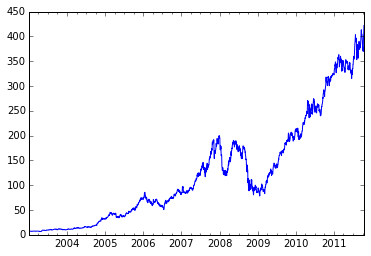

In [213]:
close_px['AAPL'].plot()

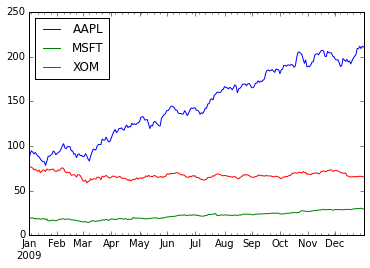

In [214]:
close_px.ix['2009'].plot()

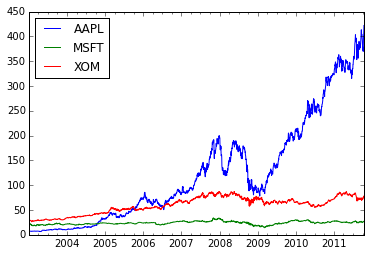

In [215]:
close_px.plot()

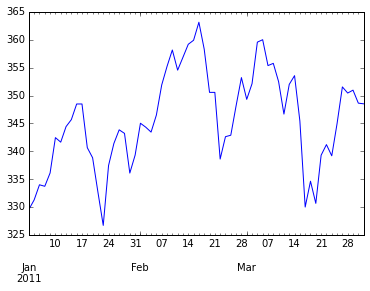

In [216]:
close_px['AAPL'].ix['1-2011':'03-2011'].plot()

In [217]:
aapl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
aapl_q[:6]

2003-03-31     7.286190
2003-06-30     8.285846
2003-09-30    10.497879
2003-12-31    10.875303
2004-03-31    11.992462
2004-06-30    14.338154
Freq: Q-DEC, Name: AAPL, dtype: float64

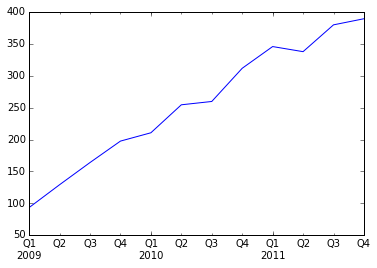

In [222]:
aapl_q.ix['2009':].plot()

## Moving window functions

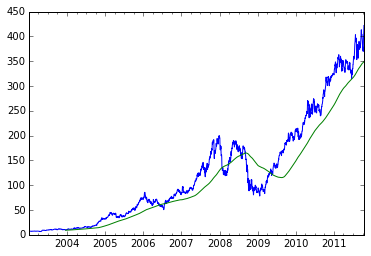

In [228]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

In [226]:
aapl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, dtype: float64

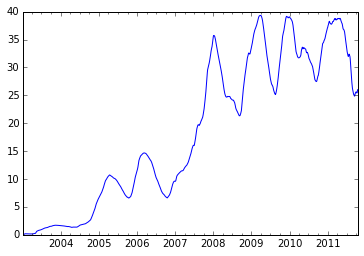

In [227]:
aapl_std250.plot()

An 'expanding window mean' is the case where the 'window is the length of the time series, but only one or more periods is required to compute a value'.

In [233]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), min_periods=1)

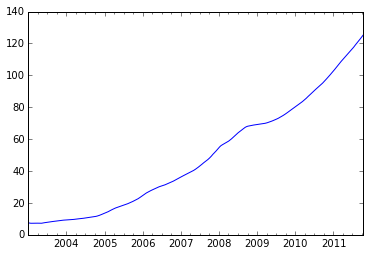

In [235]:
expanding_mean(close_px['AAPL']).plot()

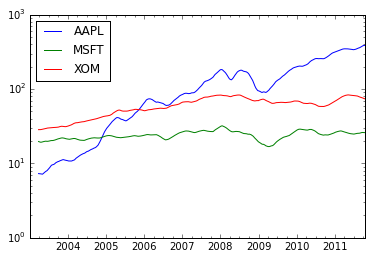

In [236]:
pd.rolling_mean(close_px, 60).plot(logy=True)

There's a bunch of 'moving window and exponentially-weighted functions' in pandas - see one list on page 323. (An 'exponentially-weighted moving average', and at least some other functions, don't have a fixed-length window.)

### Exponentially-weighted functions

The examples above use a static window size - say, the last 100 observations. You can also do something like give more recent observations a higher weight, using a 'decay factor'. Since such an exponentially-weighted statistic puts more weight on recent observations, it 'adapts' faster to changes compared to the equal-weighted version.

One way to specify a decay factor is using a 'span' - which 'makes the result comparable to a simple moving window function with window size equal to the span' (not sure how).

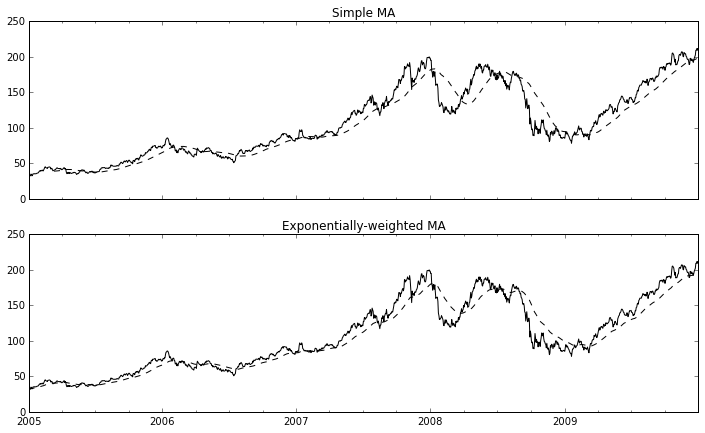

In [241]:
fix, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

## Binary moving window functions

You can also do operations - like correlation and covariance - that operate on two time series at the same time. For example, it's easy to determine a stock's correlation with a benchmark index like the S&P 500. To do this, figure out the percent changes and use rolling_corr.

In [237]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1

In [238]:
returns = close_px.pct_change()

In [239]:
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)

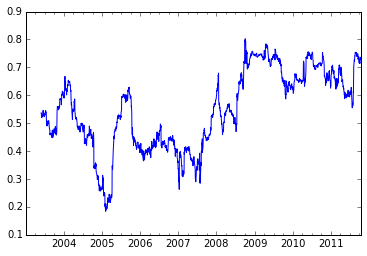

In [240]:
corr.plot()

To figure out the correlation between the S&P 500 and a bunch of stocks, you could write a loop and create a new DataFrame... but you don't have to: if you pass a time series and a DataFrame, a function like rolling_corr computes the correlation of the time series (spx_rets, for example) with each column in the DataFrame.

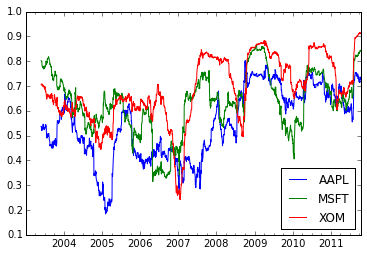

In [243]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### User-defined moving window functions

The rolling_apply function applies a custom array function over a moving window. The function must produce a single value (a reduction) from each piece of the array. 

As an example, sample quantiles can come from rolling_quantile, but 'we might be interested in the percentile rank of a particular value over the sample' which comes from scipy.stats.percentileofscore.

In [244]:
from scipy.stats import percentileofscore

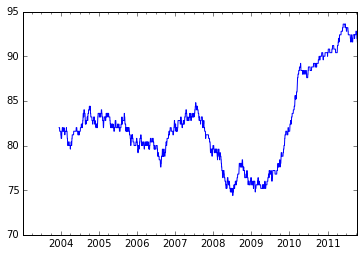

In [245]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

# Performance and memory considerations

These are discussed in more detail starting on page 327. Pandas optimizes for things like storing time series values, and for data alignment (combining differently indexed time series) and resampling.

I'll do a little here, just for practice.

In [246]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01 00:00:00.000    0.271059
2000-01-01 00:00:00.010    1.729192
2000-01-01 00:00:00.020   -1.113369
2000-01-01 00:00:00.030   -1.422869
2000-01-01 00:00:00.040    0.017179
Freq: 10L, dtype: float64

In [247]:
len(ts)

10000000

In [249]:
ts.resample('15min', how='ohlc')[:6]

,open,high,low,close
2000-01-01 00:00:00,0.271059,4.379465,-4.568692,-0.350353
2000-01-01 00:15:00,-0.288878,4.321245,-4.572948,-0.512434
2000-01-01 00:30:00,1.066454,4.297374,-4.020139,0.698976
2000-01-01 00:45:00,-0.091505,4.317723,-4.574406,-0.390107
2000-01-01 01:00:00,0.469845,4.099542,-4.445520,0.138069
2000-01-01 01:15:00,0.914184,3.958471,-4.255623,-0.933086


In [250]:
len(ts.resample('15min', how='ohlc'))

112

In [251]:
%timeit ts.resample('15min', how='ohlc')

10 loops, best of 3: 62.8 ms per loop


In [252]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)

In [253]:
%timeit ts.resample('15s', how='ohlc')

10 loops, best of 3: 88.4 ms per loop
